<a href="https://colab.research.google.com/github/sung429/DeepLearning/blob/master/keras_simpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [0]:
max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이(가장 비번한 max_features개의 단어만 사용)
batch_size = 32

In [3]:
print('데이터 로딩')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

데이터 로딩
17465344/17464789 [==============================] - 1s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스


In [4]:
print('시퀀스 패딩 (samples x time)')

시퀀스 패딩 (samples x time)


In [5]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [0]:
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras import models

In [0]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 32s 2ms/step - loss: 0.6425 - acc: 0.6107 - val_loss: 0.5801 - val_acc: 0.6822
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.4127 - acc: 0.8246 - val_loss: 0.4066 - val_acc: 0.8292
Epoch 3/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2842 - acc: 0.8890 - val_loss: 0.3553 - val_acc: 0.8496
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2083 - acc: 0.9218 - val_loss: 0.4197 - val_acc: 0.8088
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1529 - acc: 0.9428 - val_loss: 0.3912 - val_acc: 0.8574
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1027 - acc: 0.9645 - val_loss: 0.5045 - val_acc: 0.8420
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0697 - acc: 0.9774 - val_loss: 0.5348 - 

In [0]:
import matplotlib.pyplot as plt

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

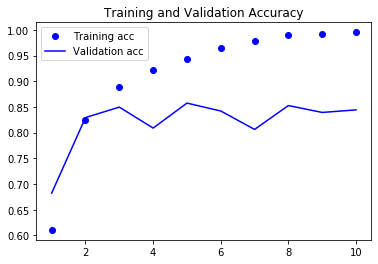

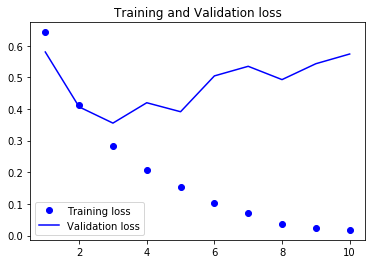

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()